# Cosmological structure

How to use `twinLab` to create a cosmological structure model.

## Configuration

In [39]:
# Standard imports
import os
import dotenv

In [40]:
USER_NAME = "mead"
GROUP_NAME = "digilab"

CAMPAIGN_ID = "cosmology"

TRAINING_DATA = "cosmology.csv"
EVALUATION_DATA = "eval.csv"
GRID_DATA = "grid.csv"

In [41]:
CAMPAIGN_DIR = os.path.join(".", "resources", "campaigns", CAMPAIGN_ID)
DATASETS_DIR = os.path.join(".", "resources", "datasets")

DATASET_PATH = os.path.join(DATASETS_DIR, TRAINING_DATA)
EVALUATION_PATH = os.path.join(CAMPAIGN_DIR, EVALUATION_DATA)
GRID_PATH = os.path.join(CAMPAIGN_DIR, GRID_DATA)

print(f"Grid........ {GRID_PATH}")
print(f"Dataset..... {DATASET_PATH}")
print(f"Evaluate.... {EVALUATION_PATH}")

Grid........ ./resources/campaigns/cosmology/grid.csv
Dataset..... ./resources/datasets/cosmology.csv
Evaluate.... ./resources/campaigns/cosmology/eval.csv


### .env

Create an `.env` file from `.env.example`, and fill in your `USER_NAME` and `GROUP_NAME`.

In [42]:
!cp .env.example .env

In [43]:
dotenv_file = dotenv.find_dotenv()
dotenv.set_key(dotenv_file, "USER_NAME", USER_NAME)
dotenv.set_key(dotenv_file, "GROUP_NAME", GROUP_NAME)

(True, 'GROUP_NAME', 'digilab')

### Library

Import the `twinLab` client with: 

In [44]:
# Standard imports
from pprint import pprint

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# twinLab
import twinlab as tl

Ensure that the correct group and user names are reported.
These are used to track client usage.

## Run

### Upload dataset

We'll use the csv data in `resources/datasets/cosmology.csv` to train our emulator:

In [45]:
tl.upload_dataset(DATASET_PATH)

**NOTE:** If your dataset is larger than `6mb` you should use `tl.upload_big_dataset(DATASET_PATH)`

### List datasets

Check which datasets are avalible to train with:

In [46]:
tl.list_datasets()

['basic.csv',
 'big.csv',
 'bigger.csv',
 'cosmology.csv',
 'leaf_spring.csv',
 'ukaea_medium.csv',
 'ukaea_small.csv']

### View dataset statistics

You can query the statistical data about a dataset:

In [47]:
tl.query_dataset(TRAINING_DATA)

,z,Omega_c,Omega_b,Omega_k,h,ns,sigma_8,w0,wa,m_nu,...,k90,k91,k92,k93,k94,k95,k96,k97,k98,k99
count,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0,0.249649,0.044972,0,0.697558,0.959181,0.799452,-1,0,0,...,3.286827,3.357599,3.426428,3.493410,3.558609,3.622064,3.683799,3.743834,3.802184,3.858866
std,0,0.029384,0.005687,0,0.114478,0.029019,0.057697,0,0,0,...,0.153509,0.152892,0.152256,0.151611,0.150973,0.150360,0.149789,0.149276,0.148834,0.148470
min,0,0.200082,0.035011,0,0.500207,0.910123,0.700198,-1,0,0,...,2.883293,2.954804,3.024412,3.092250,3.158380,3.222797,3.283726,3.342536,3.399580,3.454849
25%,0,0.223975,0.040078,0,0.597887,0.933657,0.751106,-1,0,0,...,3.180097,3.252316,3.323409,3.391702,3.457060,3.520261,3.581941,3.643193,3.703358,3.762225
50%,0,0.248158,0.044804,0,0.698779,0.958992,0.799110,-1,0,0,...,3.287929,3.359086,3.428986,3.495816,3.560391,3.623178,3.684221,3.745161,3.804141,3.861061
75%,0,0.275882,0.049994,0,0.797016,0.984595,0.848489,-1,0,0,...,3.391736,3.461365,3.529986,3.597218,3.661244,3.725638,3.785495,3.844293,3.904545,3.960580
max,0,0.299977,0.054953,0,0.899497,1.009941,0.899943,-1,0,0,...,3.732611,3.799749,3.864873,3.928097,3.989544,4.049331,4.107542,4.164213,4.219340,4.272948


### Train

Set emulator parameters:

In [48]:
# Set parameters
power_ratio = True
power_log = True
nk = 100
inputs = ["Omega_c", "Omega_b", "h", "ns", "sigma_8"]
outputs = [f"k{i}" for i in range(nk)]
params = {
    "filename": TRAINING_DATA,
    "inputs": inputs,
    "outputs": outputs,
    "decompose_outputs": True,
    "output_explained_variance": 0.999,
    "train_test_split": 900,
}
pprint(params, compact=True)

{'decompose_outputs': True,
 'filename': 'cosmology.csv',
 'inputs': ['Omega_c', 'Omega_b', 'h', 'ns', 'sigma_8'],
 'output_explained_variance': 0.999,
 'outputs': ['k0', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10',
             'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18', 'k19',
             'k20', 'k21', 'k22', 'k23', 'k24', 'k25', 'k26', 'k27', 'k28',
             'k29', 'k30', 'k31', 'k32', 'k33', 'k34', 'k35', 'k36', 'k37',
             'k38', 'k39', 'k40', 'k41', 'k42', 'k43', 'k44', 'k45', 'k46',
             'k47', 'k48', 'k49', 'k50', 'k51', 'k52', 'k53', 'k54', 'k55',
             'k56', 'k57', 'k58', 'k59', 'k60', 'k61', 'k62', 'k63', 'k64',
             'k65', 'k66', 'k67', 'k68', 'k69', 'k70', 'k71', 'k72', 'k73',
             'k74', 'k75', 'k76', 'k77', 'k78', 'k79', 'k80', 'k81', 'k82',
             'k83', 'k84', 'k85', 'k86', 'k87', 'k88', 'k89', 'k90', 'k91',
             'k92', 'k93', 'k94', 'k95', 'k96', 'k97', 'k98', 'k99'],
 'train_test_s

Train the emulator:

In [81]:
tl.train_campaign(params, CAMPAIGN_ID, server="cloud")

Status code: 504
Response: Endpoint request timed out



RuntimeError: Response error

### View the trained emulators:

Check which campaigns are ready with:

In [86]:
tl.list_campaigns()

['cosmology']

### View emulator metadata

View an emulator's metadata:

In [87]:
response = tl.query_campaign(CAMPAIGN_ID)
pprint(response, compact=True)

{'calibration_error': 43.348300319884466,
 'diagnostics': {'estimator_diagnostics': {'base_estimator_diagnostics': {'covar_module.base_kernel.lengthscale_prior.concentration': 3.0,
                                                                          'covar_module.base_kernel.lengthscale_prior.rate': 6.0,
                                                                          'covar_module.base_kernel.raw_lengthscale': [[[3.0022270515012015,
                                                                                                                         5.816019616189789,
                                                                                                                         2.813243782742138,
                                                                                                                         4.397541369710292,
                                                                                                                         4.40274

### Sample

Sample the emulator:

In [88]:
df_eval_mean, df_eval_std = tl.sample_campaign(EVALUATION_PATH, CAMPAIGN_ID)
df_train_mean, df_train_std = tl.sample_campaign(DATASET_PATH, CAMPAIGN_ID)

Read in the evaluation data and the grid of $k$ values on which to evaluate $P(k)$

In [89]:
df_train = pd.read_csv(DATASET_PATH)
df_grid = pd.read_csv(GRID_PATH)
df_eval = pd.read_csv(EVALUATION_PATH)

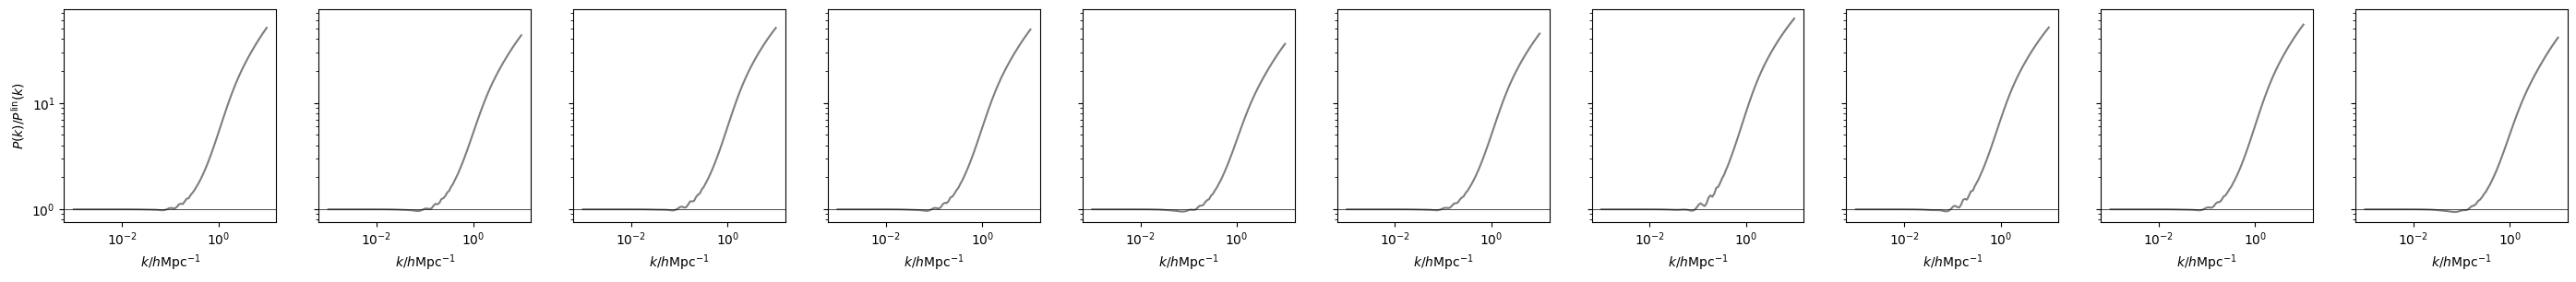

In [90]:
# Plotting parameters
nsig = [1, 2]
alpha_data = 0.5
alpha_model = 0.5
plot_band = True
npow = 10

# Plot power
plt.subplots(1, npow, figsize=(35., 3.), sharex=True, sharey=True)
grid = df_grid.iloc[0].values
for i in range(npow):
    plt.subplot(1, npow, i+1)
    if power_ratio:
        plt.axhline(1., color="black", lw=0.5)
    eval = df_eval[outputs].iloc[i].values
    mean = df_eval_mean.iloc[i].values
    err = df_eval_std.iloc[i].values
    if power_log:
        eval, mean = np.exp(eval), np.exp(mean)
    plt.plot(grid, eval, color="black", alpha=alpha_data)
    if plot_band:
        for sig in nsig:
            if power_log:
                ymin, ymax = np.exp(-sig*err), np.exp(sig*err)
                ymin, ymax = mean*ymin, mean*ymax
            else:
                ymin, ymax = -sig*err, sig*err
                ymin, ymax = mean+ymin, mean+ymax
            plt.fill_between(grid, ymin, ymax, color="blue", lw=0., alpha=alpha_model/sig)
    else:
        plt.plot(grid, mean, color="blue", alpha=0.5)
    plt.xlabel(r"$k/h\mathrm{Mpc}^{-1}$")
    plt.xscale("log")
    if i==0: 
        if power_ratio:
            plt.ylabel(r"$P(k)/P^\mathrm{lin}(k)$")
        else:
            plt.ylabel(r"$P(k)/(h^{-1}\mathrm{Mpc})^3$")
    plt.yscale("log")
plt.show()

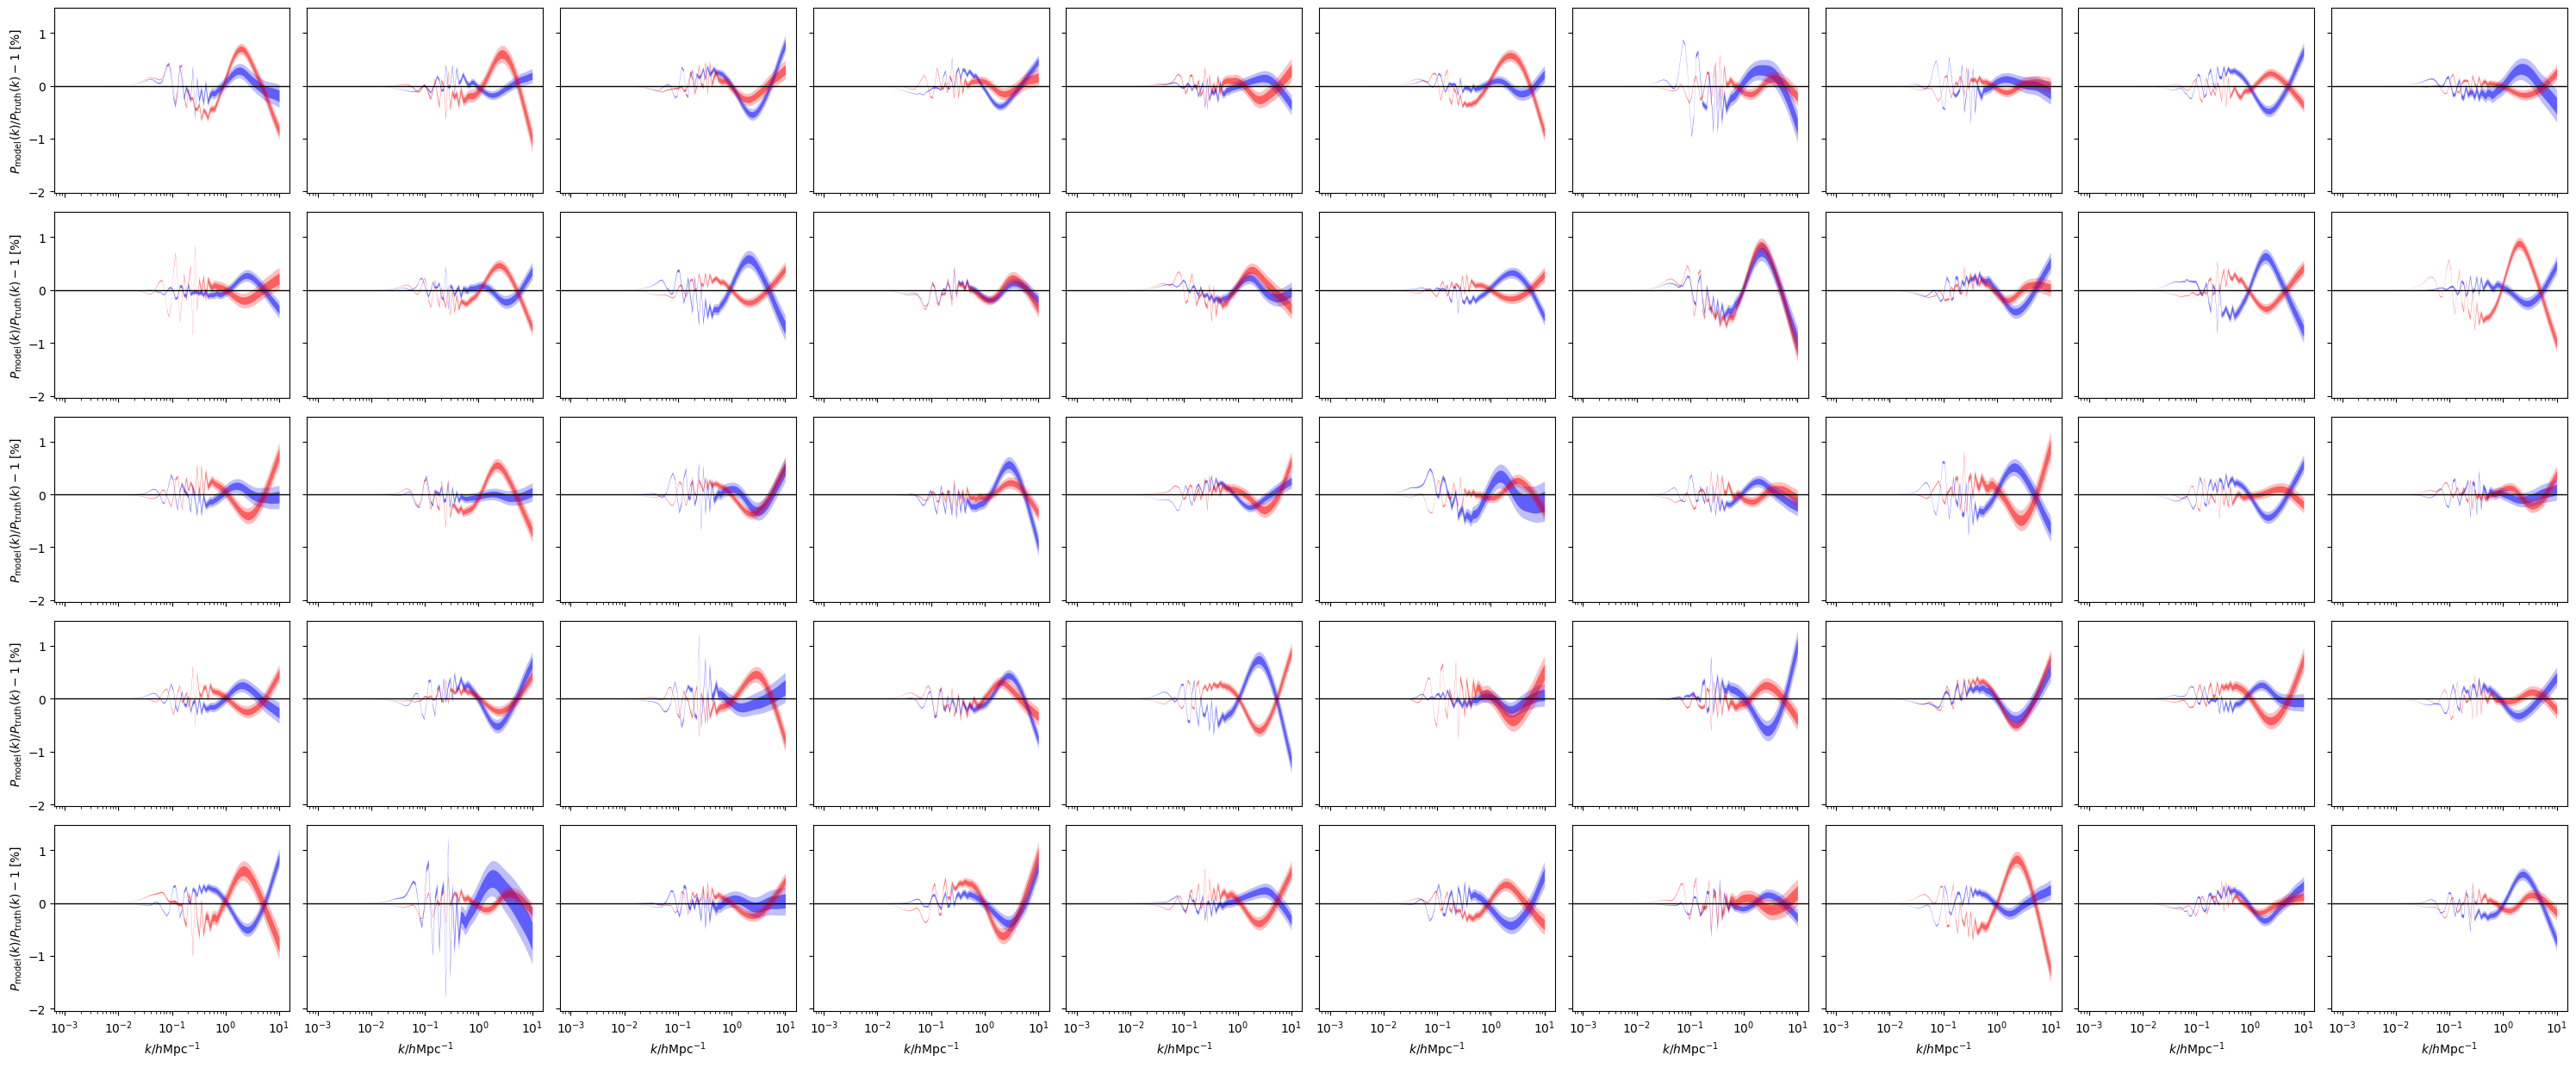

In [91]:
# Parameters
nsig = [1, 2]
alpha_data = 0.5
alpha_model = 0.5
color_model = "blue"
plot_train = True
alpha_train = 0.5
color_train = "red"
dr = 2.
plot_band = True
ncos = 50
nrow = 5

# Calculations
ncol = ncos//nrow

# Plot
grid = df_grid.iloc[0].values
plt.subplots(nrow, ncol, figsize=(30, 2.5*nrow), sharex=True, sharey=True)
for i in range(ncos):
    plt.axhline(0., color="black", lw=1)
    plt.subplot(nrow, ncol, i+1)
    eval = df_eval[outputs].iloc[i].values
    eval_mean = df_eval_mean.iloc[i].values
    eval_err = df_eval_std.iloc[i].values
    train = df_train[outputs].iloc[i].values
    train_mean = df_train_mean.iloc[i].values
    train_err = df_train_std.iloc[i].values
    if power_log:
        eval, eval_mean = np.exp(eval), np.exp(eval_mean)
        train, train_mean = np.exp(train), np.exp(train_mean)
    if plot_band:
        for sig in nsig:
            if power_log:
                ymin, ymax = np.exp(-sig*eval_err), np.exp(sig*eval_err)
                ymin, ymax = 100.*((eval_mean*ymin)/eval-1.), 100.*((eval_mean*ymax)/eval-1.)
            else:
                ymin, ymax = -sig*eval_err, sig*eval_err
                ymin, ymax = 100.*((eval_mean+ymin)/eval-1.), 100.*((eval_mean+ymax)/eval-1.)
            plt.fill_between(grid, ymin, ymax, color=color_model, lw=0, alpha=alpha_model/sig)
            if plot_train:
                if power_log:
                    ymin, ymax = np.exp(-sig*train_err), np.exp(sig*train_err)
                    ymin, ymax = 100.*((train_mean*ymin)/train-1.), 100.*((train_mean*ymax)/train-1.)
                else:
                    ymin, ymax = -sig*train_err, sig*train_err
                    ymin, ymax = 100.*((train_mean+ymin)/train-1.), 100.*((train_mean+ymax)/train-1.)
                plt.fill_between(grid, ymin, ymax, color=color_train, lw=0, alpha=alpha_train/sig)
    else:
        y = 100.*(eval_mean/eval-1.)
        plt.plot(grid, y, color=color_model, alpha=alpha_model)
        if plot_train:
            y = 100.*(train_mean/train-1.)
            plt.plot(grid, y, color=color_train, alpha=alpha_train)
    if i//ncol==nrow-1: plt.xlabel(r"$k/h\mathrm{Mpc}^{-1}$")
    plt.xscale("log")
    if i%ncol==0: plt.ylabel(r"$P_\mathrm{model}(k)/P_\mathrm{truth}(k)-1$ [%]")
    #plt.ylim(-dr, dr)
plt.tight_layout()
plt.show()

### Delete emulator

Delete a trained emulator with:

In [92]:
# tl.delete_campaign(CAMPAIGN_ID)

### Delete dataset

Delete an existing dataset with:

In [93]:
# tl.delete_dataset(TRAINING_DATA)